# 1. SETTINGS

In [29]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

In [30]:
# warnings
import warnings
warnings.filterwarnings("ignore")

In [31]:
# pandas options
pd.set_option("display.max_columns", None)

# 2. IMPORT

In [32]:
# import datasets
data = pd.read_csv("../data/prepared/data_v2_30.csv")

In [33]:
# check data
print("Dimensions:", data.shape)
data.head()

Dimensions: (16858368, 67)


,PredictionIdx,CustomerIdx,IsinIdx,BuySell,CustomerInterest,Week,Recency1,Recency2,Recency3,Recency4,Recency5,Recency6,Frequency1,Frequency2,Frequency3,Frequency4,Frequency5,Frequency6,Month,Asset Managers & Hedge Funds,Asset Owners,Banks and Intermediaries,Corporation,Official Institution - OI,Americas,Asia Pacific,"Europe, Middle East and Africa",FLOW G10,FLOW LOCAL MARKET,SAS & COVERED BONDS,A,A+,A-,AA,AA+,AA-,AAA,B,B+,B-,BB,BB+,BB-,BBB,BBB+,BBB-,C,C+,CC,CC+,CC-,CCC,CCC+,CCC-,D,DD+,DDD,DDD+,NR,MeanPrice,StdPrice,MeanYield,StdYield,MeanZScore,StdZScore,YieldMarktDelta,ZScoreMarktDelta
0,NaN,0,16471,Buy,0.0,101,29.0,29.0,21.0,10.0,28.0,27.0,0.014286,0.014286,0.200000,0.357143,11.0,20.0,5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105.323953,1.333736,3.085399,3.358929,1.903997,3.207112,0.035272,0.280414
1,NaN,0,16471,Buy,0.0,102,30.0,30.0,22.0,11.0,29.0,28.0,0.014085,0.014085,0.197183,0.352113,11.0,20.0,5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105.323953,1.333736,3.085399,3.358929,1.903997,3.207112,0.035272,0.280414
2,NaN,0,16471,Buy,0.0,103,31.0,31.0,23.0,12.0,30.0,29.0,0.013889,0.013889,0.194444,0.347222,11.0,20.0,5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105.323953,1.333736,3.085399,3.358929,1.903997,3.207112,0.035272,0.280414
3,NaN,0,16471,Buy,0.0,104,32.0,32.0,1.0,1.0,31.0,30.0,0.013699,0.013699,0.205479,0.356164,11.0,20.0,4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105.323953,1.333736,3.085399,3.358929,1.903997,3.207112,0.035272,0.280414
4,NaN,0,16471,Buy,0.0,105,33.0,33.0,2.0,2.0,32.0,31.0,0.013514,0.013514,0.202703,0.351351,11.0,20.0,4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105.323953,1.333736,3.085399,3.358929,1.903997,3.207112,0.035272,0.280414


# 3. PREPARATIONS

In [34]:
# check NA
data.isnull().sum()

PredictionIdx                     16373610
CustomerIdx                              0
IsinIdx                                  0
BuySell                                  0
CustomerInterest                    484758
Week                                     0
Recency1                                 0
Recency2                           1499925
Recency3                             14047
Recency4                              7497
Recency5                            277535
Recency6                            260934
Frequency1                               0
Frequency2                               0
Frequency3                               0
Frequency4                               0
Frequency5                               0
Frequency6                               0
Month                                    0
Asset Managers & Hedge Funds             0
Asset Owners                             0
Banks and Intermediaries                 0
Corporation                              0
Official In

In [35]:
# list of features
excluded_features = ["PredictionIdx", "CustomerIdx", "IsinIdx", "BuySell", "Week", "CustomerInterest"]
features = [var for var in data.columns if var not in excluded_features]
features

['Recency1',
 'Recency2',
 'Recency3',
 'Recency4',
 'Recency5',
 'Recency6',
 'Frequency1',
 'Frequency2',
 'Frequency3',
 'Frequency4',
 'Frequency5',
 'Frequency6',
 'Month',
 'Asset Managers & Hedge Funds',
 'Asset Owners',
 'Banks and Intermediaries',
 'Corporation',
 'Official Institution - OI',
 'Americas',
 'Asia Pacific',
 'Europe, Middle East and Africa',
 'FLOW G10',
 'FLOW LOCAL MARKET',
 'SAS & COVERED BONDS',
 'A',
 'A+',
 'A-',
 'AA',
 'AA+',
 'AA-',
 'AAA',
 'B',
 'B+',
 'B-',
 'BB',
 'BB+',
 'BB-',
 'BBB',
 'BBB+',
 'BBB-',
 'C',
 'C+',
 'CC',
 'CC+',
 'CC-',
 'CCC',
 'CCC+',
 'CCC-',
 'D',
 'DD+',
 'DDD',
 'DDD+',
 'NR',
 'MeanPrice',
 'StdPrice',
 'MeanYield',
 'StdYield',
 'MeanZScore',
 'StdZScore',
 'YieldMarktDelta',
 'ZScoreMarktDelta']

In [36]:
### drop high recency

# drop from train only
data = data[(data.Week == 121) | (data.Recency1 < data.Recency1.max())]

In [37]:
### data partitioning

# training
X_train = data.loc[data.Week < 120, features]
y_train = data.loc[data.Week < 120].CustomerInterest

# validation
X_valid = data.loc[data.Week == 120, features]
y_valid = data.loc[data.Week == 120].CustomerInterest

# test set
test = data.loc[data.Week == 121]

# 4. MODELING - STAGE 1

## LOGISTIC REGRESSION

In [38]:
# preparations
#losses = []
#costs = [1, 2, 3]

In [39]:
# modeling loop
#for c in costs:
#    print(f'Training for c = {c}...')
#    lr = LogisticRegression(C = c)
#    lr = lr.fit(X_train, y_train)
#    probs = lr.predict_proba(X_valid)[:,1]
#    loss = roc_auc_score(y_valid, probs)
#    print(f'- AUC for c = {c} = {loss}')
#    losses.append(loss)

In [40]:
# extract the best C
#cost = costs[np.argmax(losses)]
#print("Best C =", cost)

## LIGHT GBM

In [41]:
### PARAMETERS

# parallel settings
cores = 16

# learner settings
metric   = "auc"
verbose  = 10
stopping = 30

# lightGBM
gbm = lgb.LGBMClassifier(n_estimators     = 500,
                         learning_rate    = 0.005,
                         num_leaves       = 70,
                         colsample_bytree = 0.8,
                         subsample        = 0.9,
                         max_depth        = 7,
                         reg_alpha        = 0.1,
                         reg_alambda       = 0.1,
                         min_split_gain   = 0.01,
                         min_child_weight = 2,
                         random_state     = 42,
                         num_threads      = cores)

In [42]:
# train lightGBM
gbm = gbm.fit(X_train, y_train, 
              eval_set = [(X_train, y_train), (X_valid, y_valid)], 
              eval_metric = metric, verbose = verbose, 
              early_stopping_rounds = stopping)
    
# save number of iterations
num_iters = gbm.best_iteration_  

### RESULTS
# k = 8, only recency & frequency:            0.780024 (0.75749 LB)
# k = 57, added dummies & bond data:          0.782063 (0.76356 LB)
# k = 59, additional recency and frequency:   0.781909 ()
# k = 57, added 50 weeks for RF computation:  0.815764 ()
# k = 59, more weeks and 6 RF features:       0.817509 ()

Training until validation scores don't improve for 30 rounds.
[10]	training's auc: 0.812996	valid_1's auc: 0.816265
[20]	training's auc: 0.81315	valid_1's auc: 0.816903
[30]	training's auc: 0.813759	valid_1's auc: 0.81718
[40]	training's auc: 0.813909	valid_1's auc: 0.817119
[50]	training's auc: 0.81413	valid_1's auc: 0.817164
[60]	training's auc: 0.814539	valid_1's auc: 0.81722
[70]	training's auc: 0.814841	valid_1's auc: 0.817343
[80]	training's auc: 0.815016	valid_1's auc: 0.817354
[90]	training's auc: 0.81524	valid_1's auc: 0.817452
[100]	training's auc: 0.81533	valid_1's auc: 0.817435
[110]	training's auc: 0.815334	valid_1's auc: 0.817272
[120]	training's auc: 0.815444	valid_1's auc: 0.817333
Early stopping, best iteration is:
[95]	training's auc: 0.815371	valid_1's auc: 0.817509


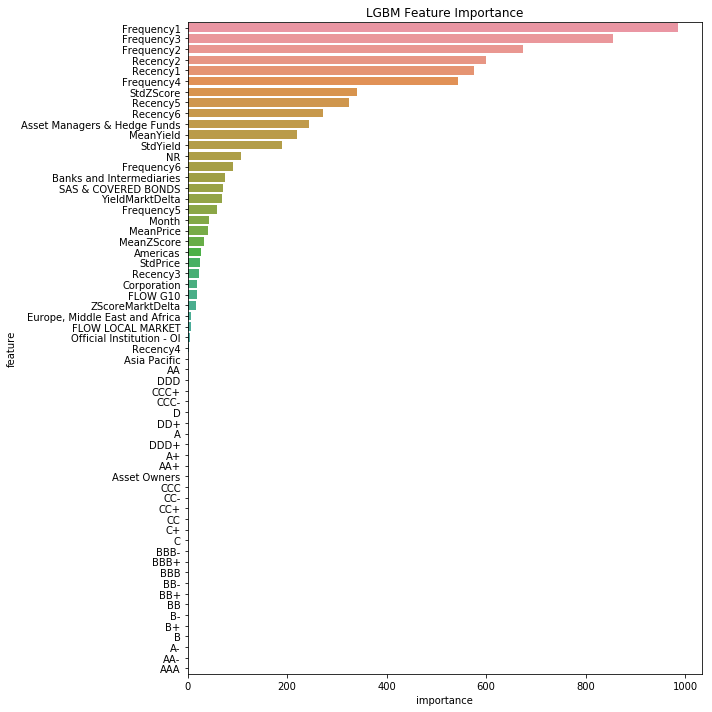

In [43]:
##### VARIABLE IMPORTANCE

# load variable importance
importance = pd.DataFrame()
importance["feature"] = features
importance["importance"] = gbm.feature_importances_

# plot variable importance
plt.figure(figsize = (10, 10))
sns.barplot(x = "importance", y = "feature", data = importance.sort_values(by = "importance", ascending = False))
plt.title('LGBM Feature Importance')
plt.tight_layout()
plt.savefig("../var_importance.pdf")

# 5. MODELING - STAGE 2

In [44]:
# use full data as train
X_train = data.loc[data.Week <= 120, features]
y_train = data.loc[data.Week <= 120].CustomerInterest

## LOGISTIC REGRESSION

In [45]:
# retrain model with the best C
#print(f'Training for c = {cost}...')
#lr = LogisticRegression(C = cost)
#lr = lr.fit(X_train, y_train)

In [46]:
# predict test set
#test["CustomerInterestLOG"] = lr.predict_proba(test[features])[:,1]

## LIGHT GBM

In [47]:
### retrain model with the best iters

# lightGBM
gbm = lgb.LGBMClassifier(n_estimators     = num_iters,
                         learning_rate    = 0.005,
                         num_leaves       = 70,
                         colsample_bytree = 0.8,
                         subsample        = 0.9,
                         max_depth        = 7,
                         reg_alpha        = 0.1,
                         reg_alambda      = 0.1,
                         min_split_gain   = 0.01,
                         min_child_weight = 2,
                         random_state     = 42,
                         num_threads      = cores)

# train lightGBM
gbm = gbm.fit(X_train, y_train, 
              eval_set = [(X_train, y_train)], 
              eval_metric = metric, verbose = verbose)

[10]	training's auc: 0.813309
[20]	training's auc: 0.813271
[30]	training's auc: 0.814019
[40]	training's auc: 0.814124
[50]	training's auc: 0.814444
[60]	training's auc: 0.814766
[70]	training's auc: 0.815023
[80]	training's auc: 0.815209
[90]	training's auc: 0.815447


In [48]:
# predict test set
test["CustomerInterestLGB"] = gbm.predict_proba(test[features], num_iteration = num_iters)[:, 1]

# 6. SUBMISSION

In [49]:
# check rank correlation with the best submission
from scipy.stats import spearmanr
best = pd.read_csv("../submissions/lgb_63vars_no40_valid0782063.csv")
spearmanr(test["CustomerInterestLGB"], best.CustomerInterest)

SpearmanrResult(correlation=0.8790446351591793, pvalue=0.0)

In [50]:
# export CSV
subm = test[["PredictionIdx", "CustomerInterestLGB"]]
subm.columns =["PredictionIdx", "CustomerInterest"]
subm.to_csv("../submissions/data_v2_30_lgb_val08175.csv", index = False, float_format = "%.8f")